In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error 
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\haris\\Desktop\\TYBCS\\CS-Practical-Solutions\\sem6\\Web_&_DA\\datasets\\car_data.csv")
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2830,Nissan Micra XL,2016,440000,33000,Petrol,Individual,Manual,Second Owner
258,Renault KWID RXT,2018,360000,26500,Petrol,Individual,Manual,First Owner
1786,Mahindra Scorpio VLS 2.2 mHawk,2009,409999,110000,Diesel,Individual,Manual,Second Owner
1804,Maruti Swift Vdi BSIII,2010,325000,79357,Diesel,Dealer,Manual,First Owner
3470,Mahindra Xylo Celebration Edition BSIV,2010,200000,240000,Diesel,Individual,Manual,Third Owner


In [4]:
df['name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object>

In [5]:
new_df =  df[df['name'] ==  'Hyundai Creta 1.6 CRDi SX Option']
# new_df = df

In [6]:
new_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
new_df.dropna(inplace=True)

C:\Users\haris\AppData\Local\Temp\ipykernel_29444\1925939579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [8]:
# new_df = new_df[['year' , 'selling_price']]
# new_df.sample(2)

In [9]:
X = np.array(new_df[['year']])
Y = np.array(new_df['selling_price'])
print(X.shape)
print(Y.shape)
print(X)

(6, 1)
(6,)
[[2018]
 [2015]
 [2018]
 [2016]
 [2015]
 [2016]]


Visualizing the data

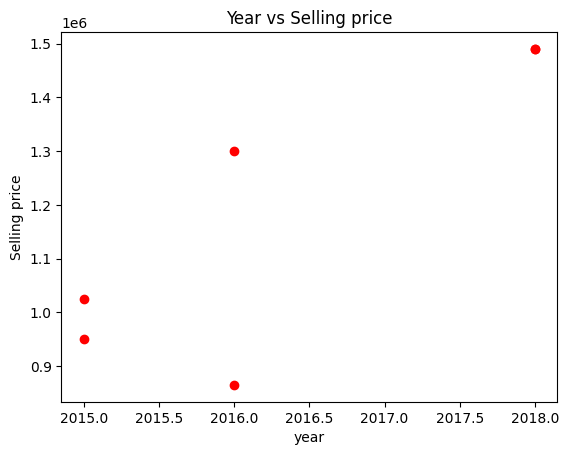

In [10]:
plt.scatter(X,Y,color="red")
plt.title('Year vs Selling price')
plt.xlabel('year')
plt.ylabel('Selling price')
plt.show()

Splitting our data set in dependent ans independent variable

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=15)


Simple linear regression

In [12]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression()

Residual analysis

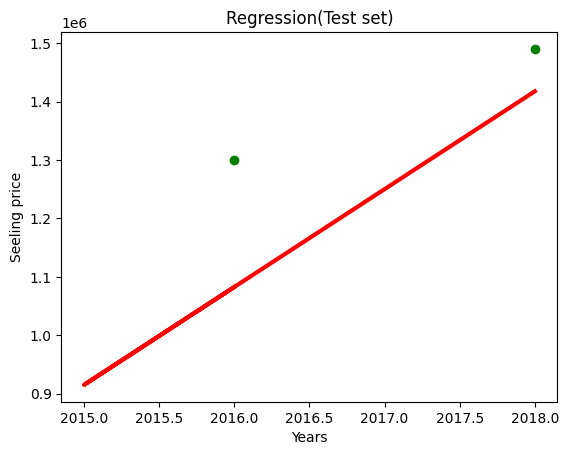

In [13]:
plt.scatter(X_test,Y_test,color="green")
plt.plot(X_train,regressor.predict(X_train) , color="red",linewidth=3)
plt.title("Regression(Test set)")
plt.xlabel('Years')
plt.ylabel('Seeling price')
plt.show()

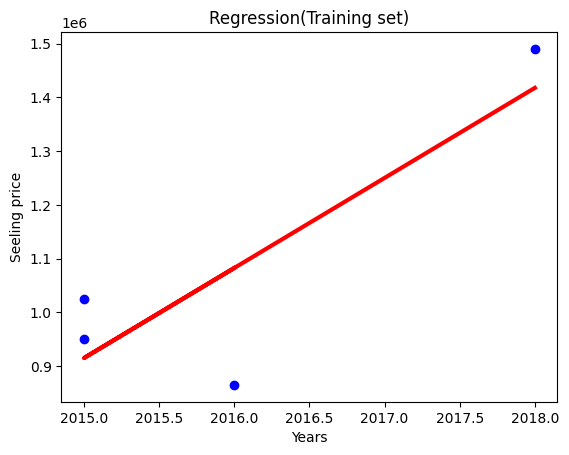

In [14]:
plt.scatter(X_train,Y_train , color="blue")
plt.plot(X_train,regressor.predict(X_train), color="red" , linewidth=3)
plt.title('Regression(Training set)')
plt.xlabel("Years")
plt.ylabel("Seeling price")
plt.show()


Predictions on the test set

In [15]:
y_pred = regressor.predict(X_test)
print('R2 score : %.2f' % r2_score(Y_test,y_pred))
print('Mean Error :',mean_squared_error(Y_test,y_pred))

def selling_price(year):
    result = regressor.predict(np.array(year).reshape(1,-1))
    return (result[0])


year = 2000
# print('Seeling price will be' , int(selling_price(year)))
print(selling_price(year))
new_df

R2 score : -1.91
Mean Error : 26281250000.0
-1597500.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
945,Hyundai Creta 1.6 CRDi SX Option,2018,1490000,20694,Diesel,Dealer,Manual,First Owner
985,Hyundai Creta 1.6 CRDi SX Option,2015,950000,60000,Diesel,Individual,Manual,First Owner
2942,Hyundai Creta 1.6 CRDi SX Option,2018,1490000,20694,Diesel,Dealer,Manual,First Owner
3516,Hyundai Creta 1.6 CRDi SX Option,2016,1300000,55000,Diesel,Individual,Manual,First Owner
3980,Hyundai Creta 1.6 CRDi SX Option,2015,1025000,90000,Diesel,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Linear Regression with scikit-learn

In [16]:
from sklearn import linear_model

features = [[1],
            [2],
            [3],
            [5],
            [6],
            [7]]
labels = [1,4,9,25,36,49]

clf = linear_model.LinearRegression()
clf = clf.fit(features,labels)

predict = clf.predict([[8]])
predict


array([52.66666667])

### Building a Logistic regression model
steps
* Import libraries/packages
* Reading and understanding the data(do appropriate transformation-cleaning,filling nulls,duplicates ,etc)
* Splitting our data set in dependent and independent variables
* performing simple linear regression(create logistic regression model)
* Print the accuracy and plot the confusion matrix 
* print test data and predict data prediction on the test set

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn  as sn 
import matplotlib.pyplot as plt


In [18]:
data = pd.read_csv("C:\\Users\\haris\\Desktop\\TYBCS\\CS-Practical-Solutions\\sem6\\Web_&_DA\\datasets\\student_score.csv")
data

,index,gmat,gpa,work_experience,admmitted
0,22,520,2.3,4,0
1,20,620,3.3,2,1
2,21,670,3.3,6,1
3,23,680,3.9,4,0
4,24,610,2.7,3,0
5,15,650,3.7,6,0
6,28,650,3.7,6,1
7,24,610,2.7,3,0
8,15,650,3.7,6,0
9,28,650,3.7,6,1


splitting data into dependent and independent variables
- admitted as dependent variable and other are independent variables

In [19]:
x = data.iloc[:,[2,3]].values  #independent variables
y = data.iloc[:,4].values  #dependent variable 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred = logistic_regression.predict(x_test)

Print the accuracy and plot the confusion matrix

Accuracy  0.6666666666666666


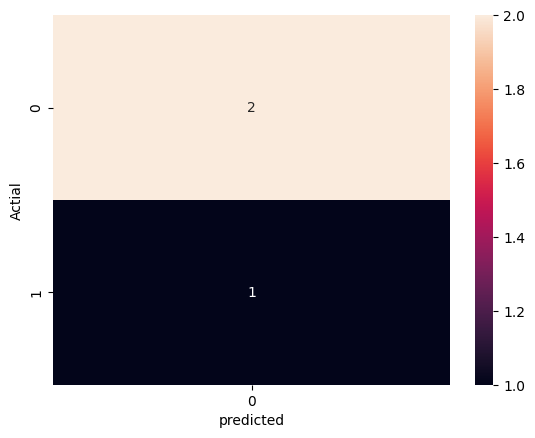

In [20]:
confusion_matrix = pd.crosstab(y_test , y_pred , rownames=['Actial'] , colnames=['predicted'])
sn.heatmap(confusion_matrix , annot=True)
print("Accuracy " , metrics.accuracy_score(y_test,y_pred))
plt.show()


##### accuracy = (TP + TN) / total 

In [21]:
print(x_test)
print(y_pred)

[[3.3 6. ]
 [3.7 6. ]
 [2.7 3. ]]
[0 0 0]
